# cygnus-bandit
11/09/2023

Evaluate Cygnus with a Micro-Armed Bandit tuner for prefetch aggressiveness.
- 200 MT/s and 3200 MT/s
- `default_dramsim3_2022` config

In [1]:
import os
from importlib import reload
import sys
from typing import Dict, List, Optional

from matplotlib import pyplot as plt
from matplotlib import colormaps
import pandas as pd

sys.path.append(os.path.abspath("../../"))
from plot_utils import collate, plot

# Configuration

In [2]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/dram_dramsim3_2022/"
baseline_study = "baseline"
baseline_experiment = "_baseline"
bandwidths = [200, 3200]
weights_path = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
]

dpi = 192

In [3]:
reload(collate)
studies = {}

for bandwidth in bandwidths:
    print(f"\n=== {bandwidth} MT/s ===")
    core_str = f"default_{bandwidth}"
    core_dir = os.path.join(sim_dir, core_str)
    
    print(f"~~~ {os.path.join(core_dir, 'prefetchers')} ~~~")
    studies[f"prefetchers__{bandwidth}"] = collate.StudyCollator(
        core_dir, "prefetchers",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
        experiments=["pythia", "spp_ppf", "my5", "mab", "cygnus"]
    )

    print(f"~~~ {os.path.join(core_dir, 'cygnus_qvthreshold')} ~~~")
    studies[f"cygnus_qvthreshold__{bandwidth}"] = collate.StudyCollator(
        core_dir, "cygnus_qvthreshold",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
        experiments=["cygnus__-2", "cygnus__-3", "cygnus__9"]
    )

    print(f"~~~ {os.path.join(core_dir, 'cygnus_bandit')} ~~~")
    studies[f"cygnus_bandit__{bandwidth}"] = collate.StudyCollator(
        core_dir, "cygnus_bandit",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    )


=== 200 MT/s ===
~~~ /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3_2022/default_200/prefetchers ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1877/1877 [00:12<00:00, 151.86file/s]


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3_2022/default_200/cygnus_qvthreshold ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 291/291 [00:05<00:00, 49.08file/s] 


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3_2022/default_200/cygnus_bandit ~~~


[ipykernel_launcher][angrist-3] Reading study files:  39%|███▊      | 142/367 [00:02<00:02, 108.27file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3_2022/default_200/cygnus_bandit/cygnus_bandit/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000: Skipping reading because it failed


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 367/367 [00:05<00:00, 72.10file/s] 


[ipykernel_launcher][angrist-3] Collating study files...

=== 3200 MT/s ===
~~~ /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3_2022/default_3200/prefetchers ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1877/1877 [00:13<00:00, 142.62file/s]


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3_2022/default_3200/cygnus_qvthreshold ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 291/291 [00:06<00:00, 44.64file/s] 


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3_2022/default_3200/cygnus_bandit ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 367/367 [00:05<00:00, 71.18file/s] 


[ipykernel_launcher][angrist-3] Collating study files...


In [28]:
baseline_df_3200 = {
    "Cygnus (static, -3)": studies[f"prefetchers__3200"][f"cygnus"],
    "Cygnus (static, -2)": studies[f"cygnus_qvthreshold__3200"][f"cygnus__-2"],
    "Cygnus (bandit)": studies[f"cygnus_bandit__3200"][f"cygnus_bandit"],
    "my5": studies[f"prefetchers__3200"][f"my5"],
    "SPP+PPF": studies[f"prefetchers__3200"][f"spp_ppf"],
    "Pythia": studies[f"prefetchers__3200"][f"pythia"],
    "MAB": studies[f"prefetchers__3200"][f"mab"],
}
baseline_df_200 = {
    "Cygnus (static, -3)": studies[f"prefetchers__200"][f"cygnus"],
    "Cygnus (static, +9)": studies[f"cygnus_qvthreshold__200"][f"cygnus__9"],
    "Cygnus (bandit)": studies[f"cygnus_bandit__200"][f"cygnus_bandit"],
    "my5": studies[f"prefetchers__200"][f"my5"],
    "SPP+PPF": studies[f"prefetchers__200"][f"spp_ppf"],
    "Pythia": studies[f"prefetchers__200"][f"pythia"],
    "MAB": studies[f"prefetchers__200"][f"mab"],
}

baseline_colors = {
    "Cygnus (static, -3)": colormaps["Set3"](0),
    "Cygnus (static, -2)": colormaps["Set3"](0),
    "Cygnus (static, +9)": colormaps["Set3"](0),
    "Cygnus (bandit)": colormaps["Set3"](0),
    "my5"    : colormaps["Set3"](9),
    "Pythia" : colormaps["Set3"](2),
    "MAB"    : colormaps["Set3"](5),
    "SPP+PPF": colormaps["Set3"](6),
}
baseline_hatches = {
    "Cygnus (static, -3)": "",
    "Cygnus (static, -2)": "////",
    "Cygnus (static, +9)": "////",
    "Cygnus (bandit)": ".",
    "my5"    : "",
    "MAB"    : "",
    "Pythia" : "",
    "SPP+PPF": "",
}
baseline_legend_kwargs = {
    "ncol": 3,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
baseline_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

# Results

## 3200 MT/s

### IPC improvement

In [29]:
reload(plot)
plot.get_suite_table(
    baseline_df_3200, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gmean
"Cygnus (static, -3)",34.157117,25.502473,10.803229,22.131828,22.860370
"Cygnus (static, -2)",34.252495,25.804238,10.741114,21.877458,22.874702
Cygnus (bandit),34.178952,25.623246,10.239095,20.734725,22.385668
my5,29.635344,21.920663,8.431924,18.328960,19.333461
SPP+PPF,32.208799,22.860580,7.766227,18.423648,19.990955
Pythia,26.610409,20.813901,7.597408,19.632290,18.456565
MAB,26.540875,21.345148,7.012089,18.883139,18.222895


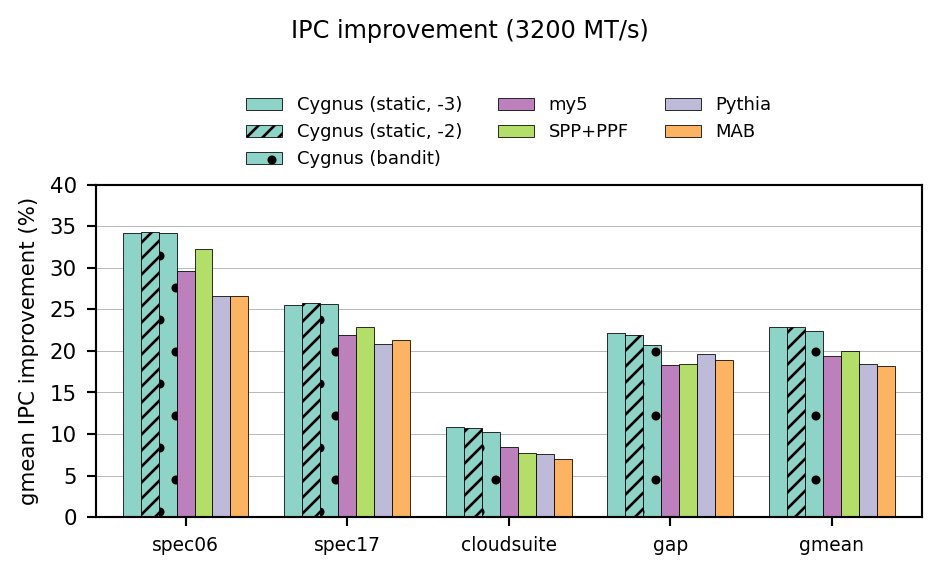

In [30]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_3200, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (3200 MT/s)",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 40),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("bandit_3200_ipc.png", dpi=dpi, bbox_inches="tight")
plt.savefig("bandit_3200_ipc.pdf", dpi=dpi, bbox_inches="tight")

#### spec06

In [8]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,"Cygnus (static, -3)","Cygnus (static, -2)",Cygnus (bandit),my5,SPP+PPF,Pythia,MAB
GemsFDTD,78.112278,78.823743,80.819768,62.960580,77.372909,67.456766,56.392414
astar,6.647592,6.741404,4.822089,2.028227,7.139077,6.661678,6.043129
bwaves,43.486044,43.839102,51.623695,20.868293,49.160476,24.388410,23.513824
cactusADM,66.101280,66.222297,65.957550,41.823720,64.158014,53.091516,46.040093
gcc,32.507038,32.046024,30.678857,24.695838,23.319753,16.665946,21.780984
lbm,50.488014,50.286038,50.214855,49.582529,48.108897,41.026537,44.540319
leslie3d,30.867163,31.053402,30.129487,25.129427,30.495707,26.225972,25.028056
libquantum,66.853207,67.107738,64.773017,67.037749,62.830374,49.897245,57.278055
mcf,11.826420,10.975090,9.741501,24.581670,8.719207,12.980070,14.170601
milc,8.870268,10.578002,18.084081,25.876553,18.407892,13.078440,8.029343


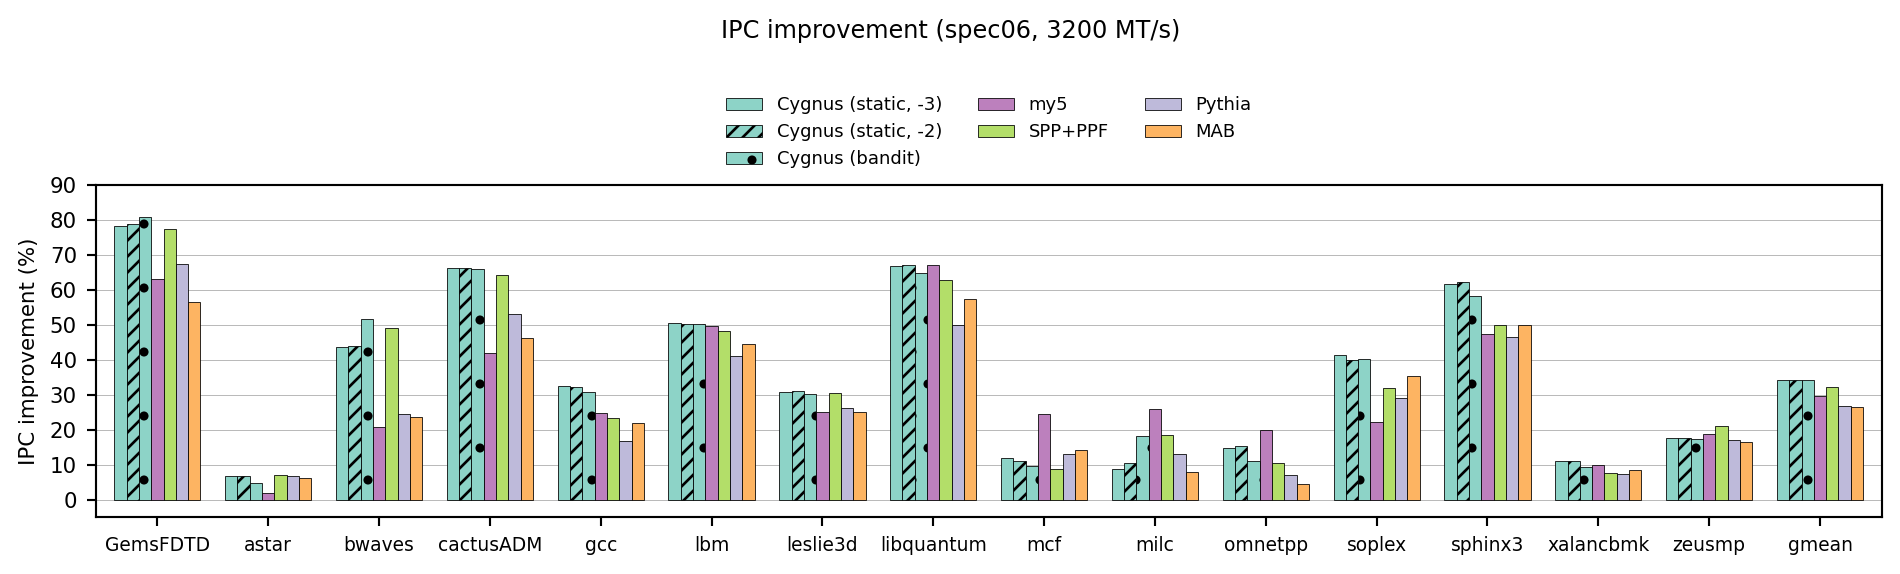

In [9]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06, 3200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 90),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

#### spec17

In [10]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,"Cygnus (static, -3)","Cygnus (static, -2)",Cygnus (bandit),my5,SPP+PPF,Pythia,MAB
602.gcc,66.731995,66.784417,66.157823,64.413853,63.946845,61.682199,63.114668
605.mcf,6.733695,7.526444,8.904713,10.534453,13.834952,5.487090,10.549767
607.cactuBSSN,28.868049,28.143027,26.713578,11.688620,26.225208,32.860009,13.997358
619.lbm,22.644127,22.596278,22.519061,21.986045,20.883976,18.320052,20.343672
620.omnetpp,9.373423,9.593929,8.122506,10.922158,4.084605,4.766830,1.940865
623.xalancbmk,11.418051,11.861146,12.639935,14.316281,8.908960,9.336954,12.263701
627.cam4,2.345705,2.187452,1.031618,0.707176,1.462569,1.656462,1.595492
628.pop2,18.368821,18.377028,18.263640,9.759543,14.624107,13.037956,13.946366
649.fotonik3d,86.030321,88.922485,90.598194,71.518744,69.897745,55.377443,74.048496
gmean,25.502473,25.804238,25.623246,21.920663,22.860580,20.813901,21.345148


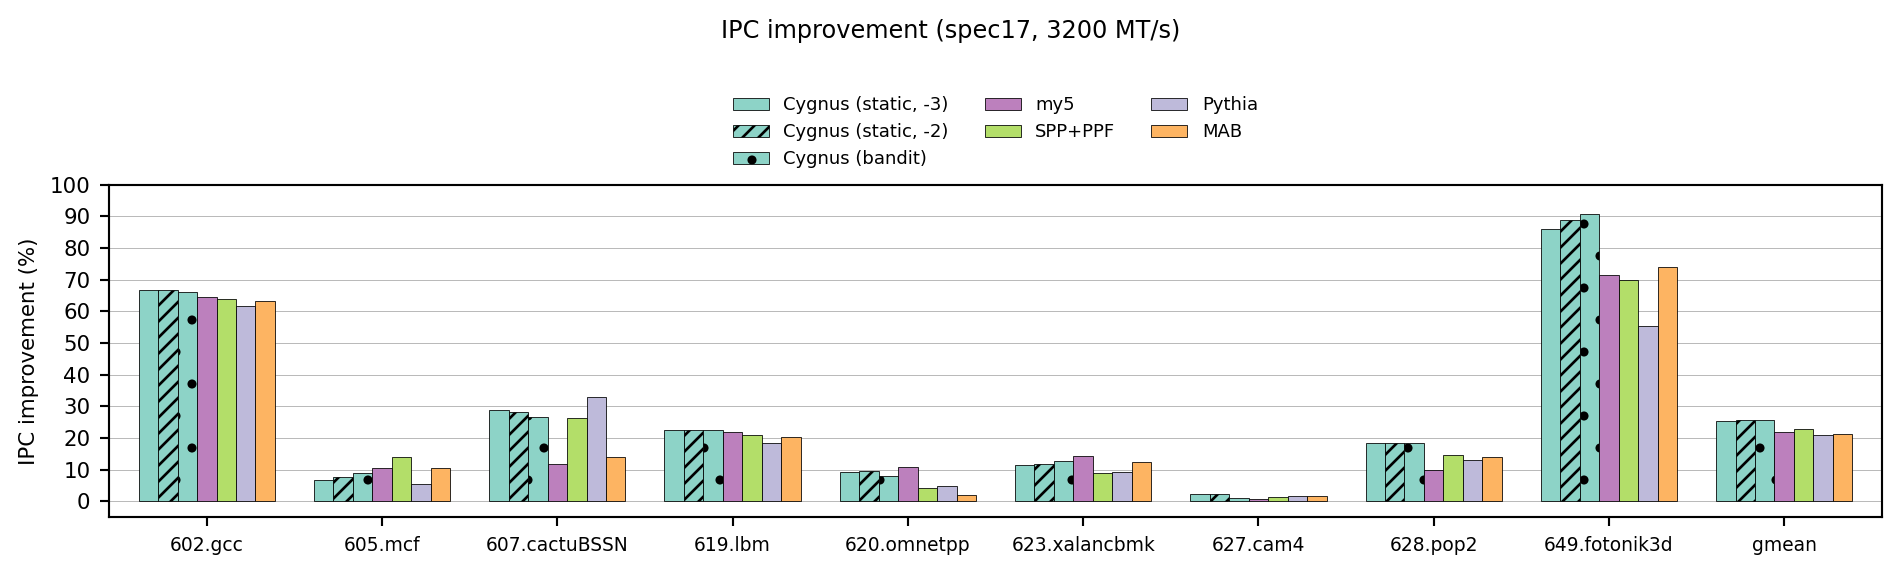

In [11]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17, 3200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

#### gap

In [12]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,"Cygnus (static, -3)","Cygnus (static, -2)",Cygnus (bandit),my5,SPP+PPF,Pythia,MAB
bc,11.938550,11.893636,12.725331,9.916844,10.000532,11.617661,11.376465
bfs,63.083605,61.286434,51.567663,44.028667,48.376595,47.355363,44.644473
cc,34.987449,34.885207,33.390155,34.364662,31.948580,33.167361,34.493903
pr,2.785289,2.605232,3.794242,2.140314,2.112297,2.750370,3.078863
sssp,8.210877,8.280371,8.185071,4.341574,5.410705,8.610742,5.510925
tc,21.084317,21.186305,21.032148,21.085867,18.987937,19.932712,19.799957
gmean,22.131828,21.877458,20.734725,18.328960,18.423648,19.632290,18.883139


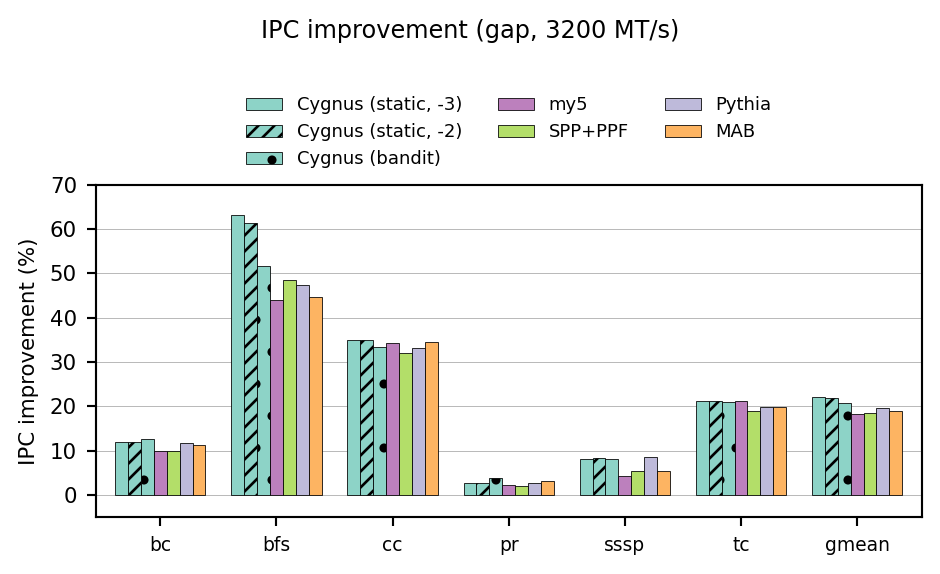

In [13]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap, 3200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 70),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))

#### cloudsuite

In [14]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,"Cygnus (static, -3)","Cygnus (static, -2)",Cygnus (bandit),my5,SPP+PPF,Pythia,MAB
cassandra,10.472271,10.975471,9.338480,10.899316,10.435769,10.679946,8.285899
classifcation,-10.545401,-9.856146,-8.496558,-1.605971,-7.626151,-8.431991,-8.440215
cloud9,26.296021,24.489653,23.964053,8.143545,13.130756,13.247164,11.951900
nutch,20.771383,20.764470,19.079316,17.146801,16.866817,16.779658,18.147146
gmean,10.803229,10.741114,10.239095,8.431924,7.766227,7.597408,7.012089


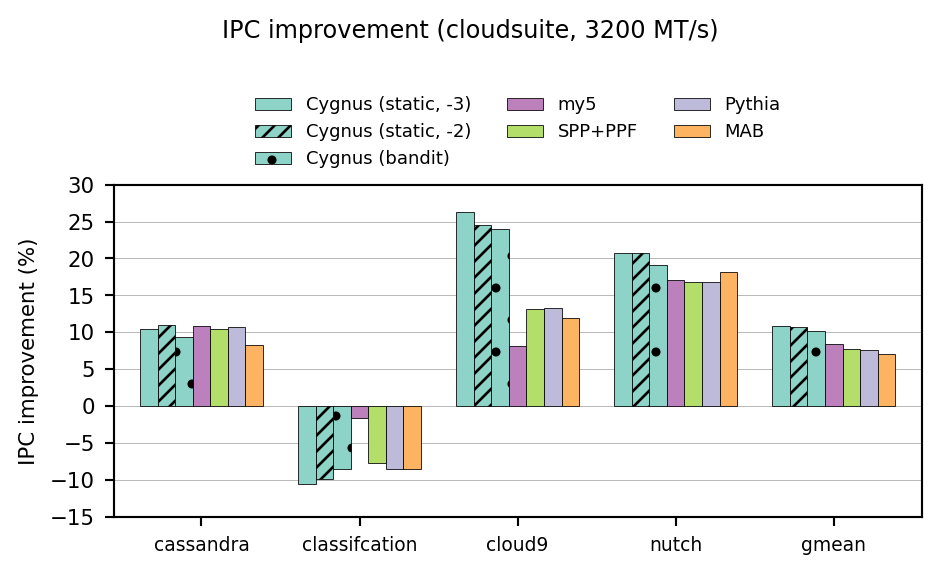

In [15]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (cloudsuite, 3200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 30),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))

## Prefetch classification

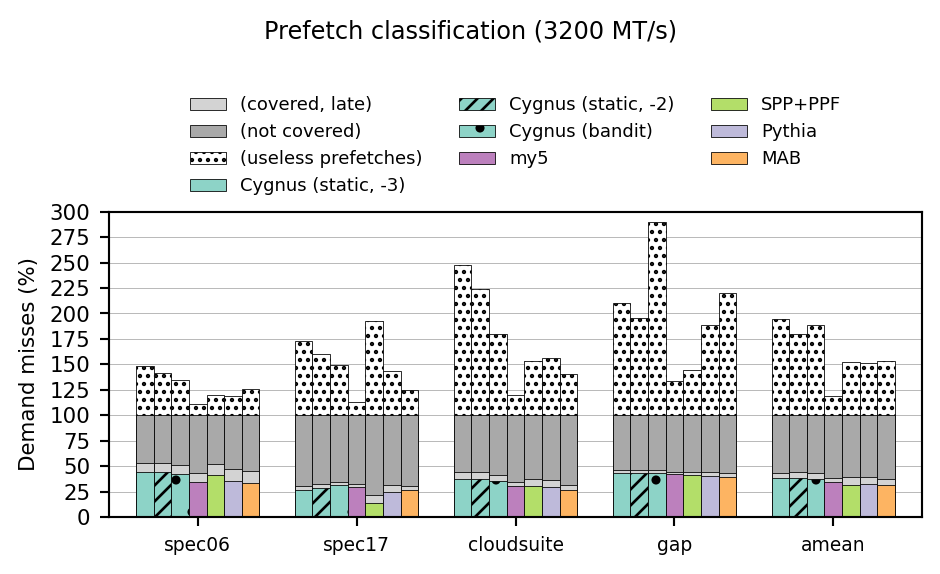

In [16]:
reload(plot)
plot.plot_suite_overpredictions(
    baseline_df_3200,
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="Prefetch classification (3200 MT/s)",
    add_xlabel=False,
    ylim=(0, 300),
    ytick_distance=25,
    dpi=192, figsize=(5, 3)
)
plt.savefig("bandit_3200_classification.png", dpi=dpi, bbox_inches="tight")
plt.savefig("bandit_3200_classification.pdf", dpi=dpi, bbox_inches="tight")

## 200 MT/s

### IPC improvement

In [17]:
plot.get_suite_table(
    baseline_df_200, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gmean
"Cygnus (static, -3)",0.025962,6.083281,-10.298429,19.915836,3.361563
"Cygnus (static, +9)",7.007970,10.021464,5.257143,31.433722,12.969962
Cygnus (bandit),7.473436,10.049449,3.860657,23.449669,10.970489
my5,7.864061,12.803516,4.676752,27.666547,12.922813
SPP+PPF,6.158251,10.074553,-0.632222,28.332860,10.485691
Pythia,6.634564,9.004599,0.782206,28.220061,10.705874
MAB,6.116718,10.495755,1.125905,27.628870,10.913699


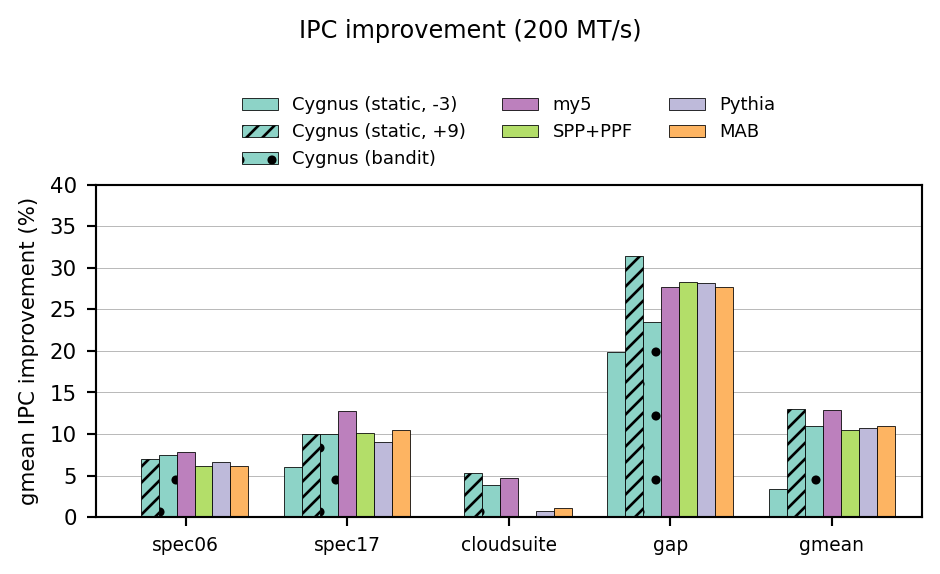

In [18]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_200, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (200 MT/s)",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 40),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("bandit_200_ipc.png", dpi=dpi, bbox_inches="tight")
plt.savefig("bandit_200_ipc.pdf", dpi=dpi, bbox_inches="tight")

#### spec06

In [19]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_200, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,"Cygnus (static, -3)","Cygnus (static, +9)",Cygnus (bandit),my5,SPP+PPF,Pythia,MAB
GemsFDTD,-1.856822,1.448196,0.188876,1.128288,-0.711121,0.363902,0.167552
astar,6.605782,5.863799,6.251165,3.608290,10.434564,8.399857,5.019772
bwaves,11.825902,11.819179,11.794609,8.896853,11.526736,9.389400,9.115207
cactusADM,30.909982,30.451273,30.777534,23.779923,30.550407,28.655017,29.180428
gcc,-1.065679,3.552485,12.744154,12.378841,14.210574,13.230451,8.478762
lbm,5.593932,5.409726,5.481093,5.508011,5.263389,4.930386,4.691514
leslie3d,2.674754,2.937711,1.344305,3.202088,3.101507,3.198196,2.083456
libquantum,20.707032,20.472586,20.621725,20.771977,20.419948,20.501893,19.871003
mcf,2.451890,0.685325,1.387696,17.427433,3.507582,2.078901,0.408334
milc,-15.998024,-2.676297,-2.350472,3.814834,-2.000381,-2.690260,-0.283592


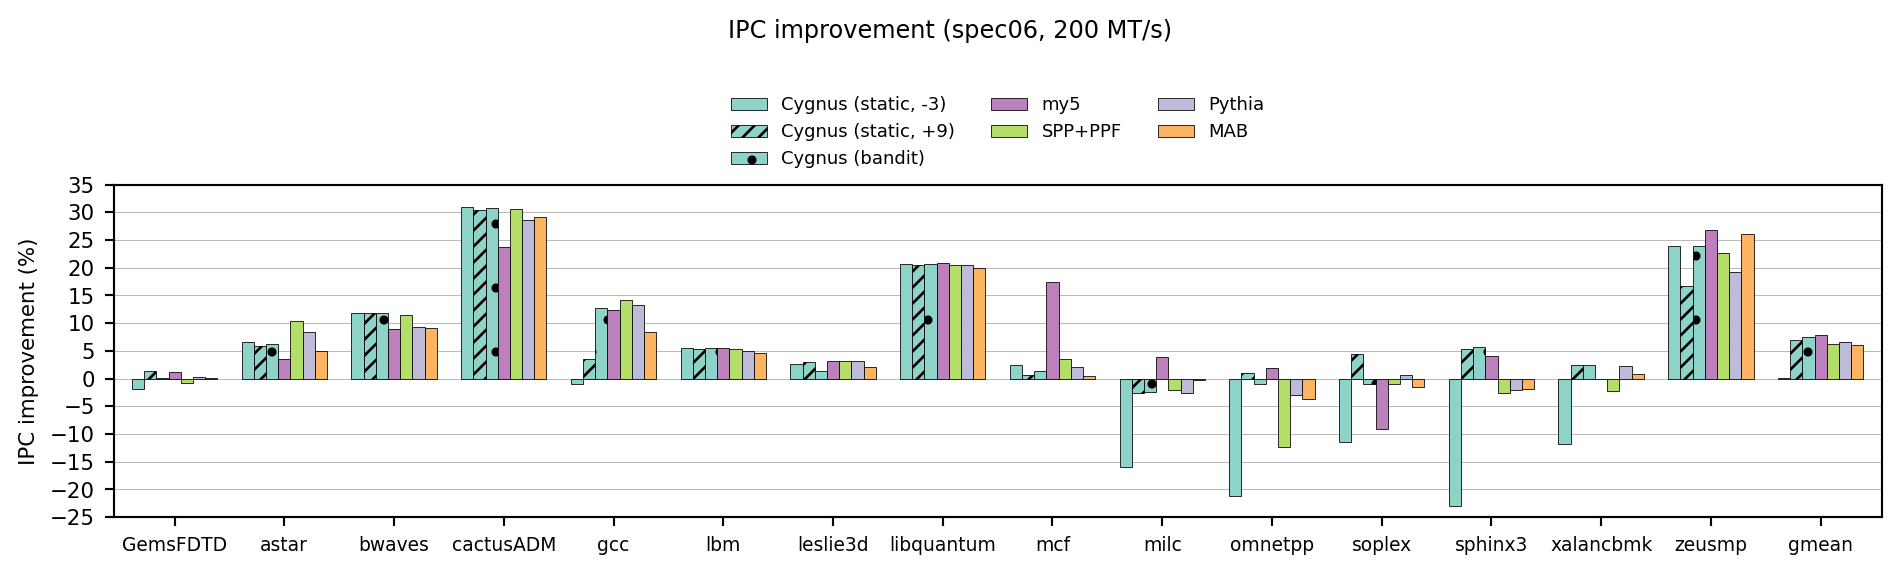

In [20]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_200, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06, 200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-25, 35),
    ytick_distance=5,
    dpi=192, figsize=(10, 3))

#### spec17

In [21]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_200, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,"Cygnus (static, -3)","Cygnus (static, +9)",Cygnus (bandit),my5,SPP+PPF,Pythia,MAB
602.gcc,88.397736,101.941200,100.293937,98.712190,99.659990,103.359478,101.866434
605.mcf,-15.294105,-3.527827,-3.290382,7.230852,-1.914458,-11.571318,2.103165
607.cactuBSSN,1.796460,0.017860,1.604982,9.127455,10.484834,5.091621,2.657165
619.lbm,2.767946,2.551891,2.611358,2.625128,2.472395,2.276043,1.699880
620.omnetpp,-11.818766,-0.197146,-0.400478,5.356975,-8.154200,-3.550951,-1.882410
623.xalancbmk,5.985666,7.914860,7.978655,10.328046,5.836173,5.750270,8.173615
627.cam4,0.166903,0.729055,0.138120,0.028514,0.598596,0.917394,-0.194880
628.pop2,5.994184,6.130159,6.065674,4.025320,6.415652,6.039929,4.801226
649.fotonik3d,2.710117,2.666974,2.629801,2.461248,2.821968,2.988544,2.780312
gmean,6.083281,10.021464,10.049449,12.803516,10.074553,9.004599,10.495755


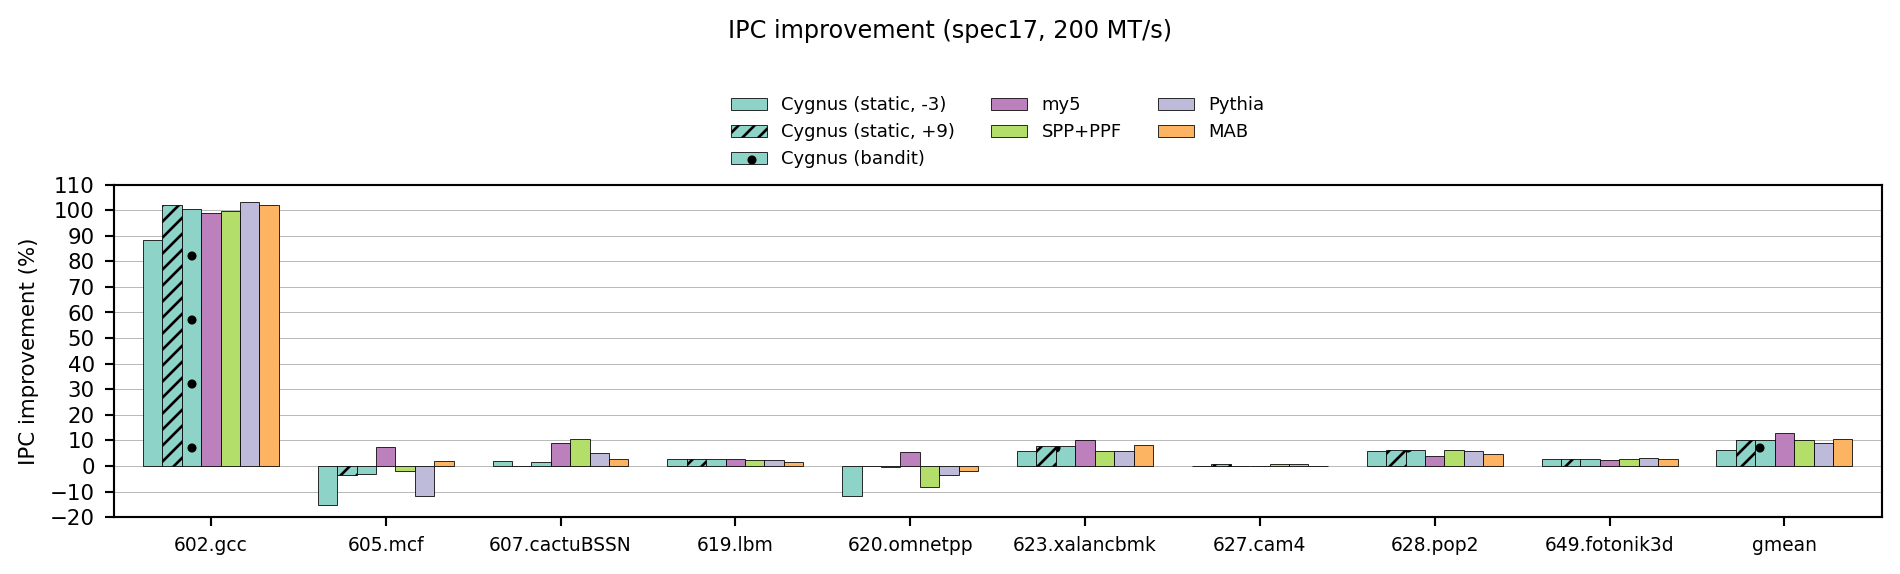

In [22]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_200, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17, 200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-20, 110),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

#### gap

In [23]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_200, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,"Cygnus (static, -3)","Cygnus (static, +9)",Cygnus (bandit),my5,SPP+PPF,Pythia,MAB
bc,9.465663,15.683596,12.065867,11.160025,14.414280,13.706624,14.082038
bfs,-0.040278,43.999344,0.707484,38.741858,37.663890,37.227838,34.068736
cc,82.362460,80.966169,81.958974,81.479831,74.976017,78.074675,80.220031
pr,8.089628,3.861596,9.003135,6.931833,6.075710,7.761415,8.852850
sssp,-1.722509,11.083102,7.421076,0.017559,8.867183,7.910755,9.083618
tc,40.275800,48.220461,47.198200,44.642160,40.357462,37.523755,32.052417
gmean,19.915836,31.433722,23.449669,27.666547,28.332860,28.220061,27.628870


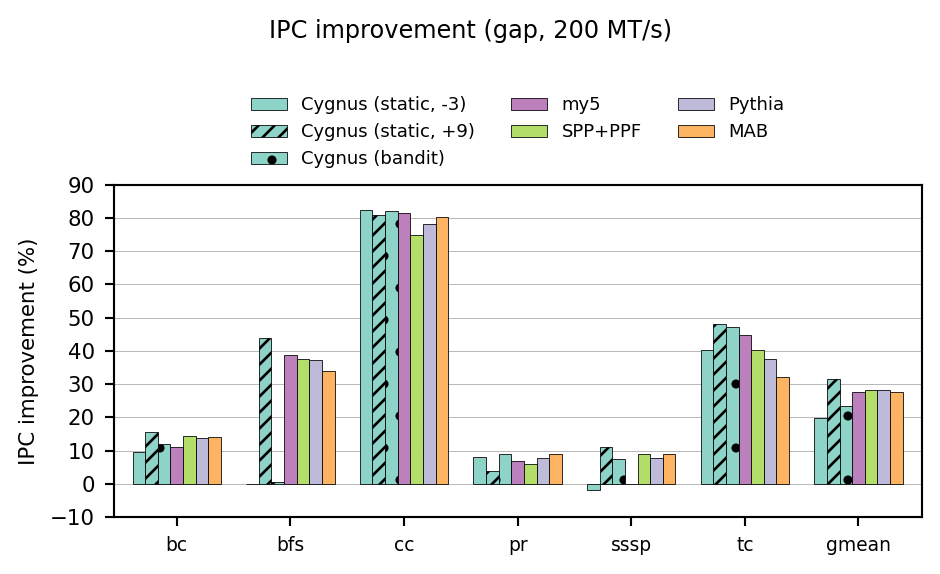

In [24]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_200, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap, 200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-10, 90),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))

#### cloudsuite

In [25]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_200, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,"Cygnus (static, -3)","Cygnus (static, +9)",Cygnus (bandit),my5,SPP+PPF,Pythia,MAB
cassandra,-22.676473,1.448488,0.556194,6.389319,-6.821497,-0.477052,2.463573
classifcation,-31.459317,-7.100280,-9.615757,-6.400863,-18.353937,-19.229083,-16.031534
cloud9,9.612453,10.942023,11.919942,2.948923,12.800505,10.035433,7.505892
nutch,11.450035,17.395174,14.391887,17.114124,13.610979,16.633854,13.065915
gmean,-10.298429,5.257143,3.860657,4.676752,-0.632222,0.782206,1.125905


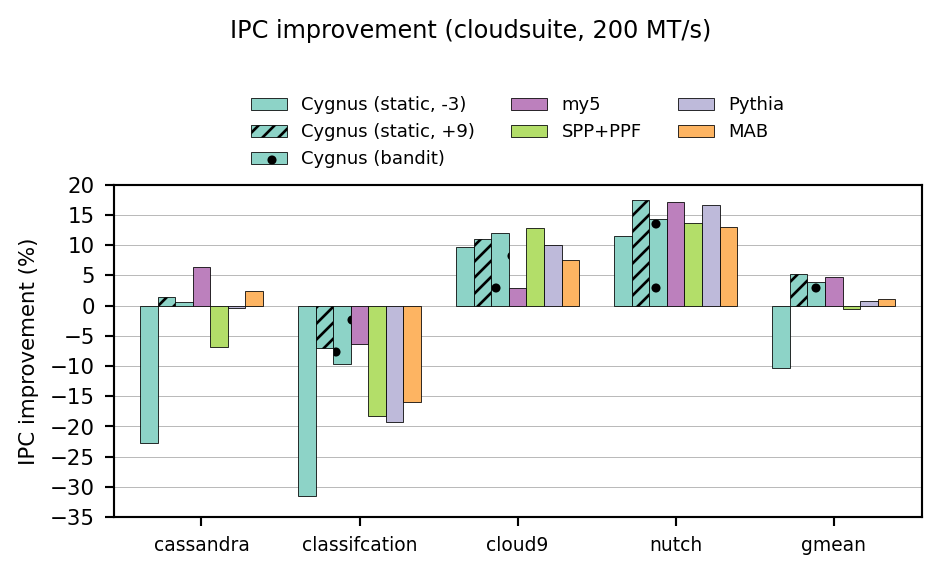

In [26]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_200, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (cloudsuite, 200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-35, 20),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))

### Prefetch classification

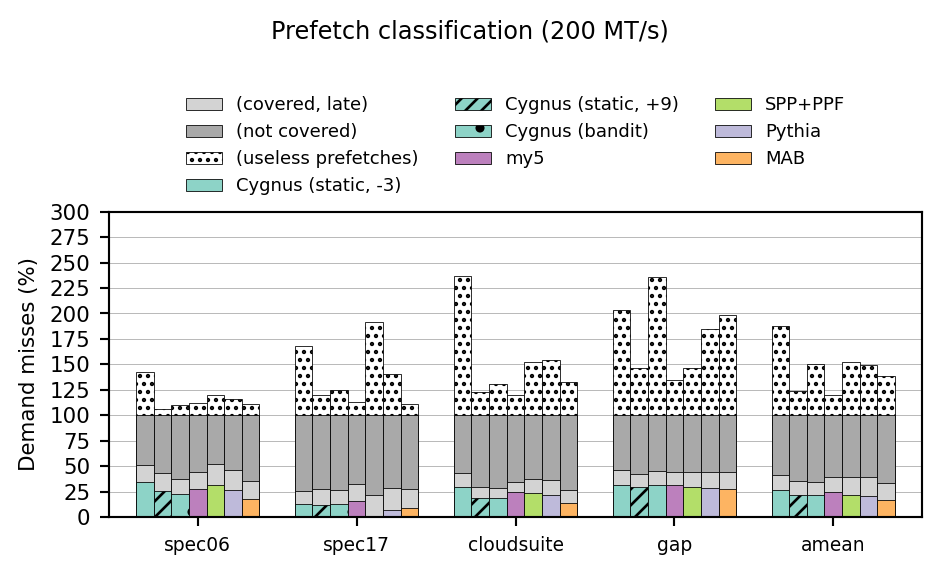

In [27]:
reload(plot)
plot.plot_suite_overpredictions(
    baseline_df_200,
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="Prefetch classification (200 MT/s)",
    add_xlabel=False,
    ylim=(0, 300),
    ytick_distance=25,
    dpi=192, figsize=(5, 3)
)
plt.savefig("bandit_200_classification.png", dpi=dpi, bbox_inches="tight")
plt.savefig("bandit_200_classification.pdf", dpi=dpi, bbox_inches="tight")